In [1]:
# you can load the individual libraries or simple source the CAVA Analytics file
library(loadeR)
library(tidyverse)
library(rnaturalearth)
library(sf)
library(raster)
Sys.setenv("PROJ_LIB" = "/opt/conda/envs/fao/share/proj") # needed to visualize sf objects

Loading required package: rJava

Loading required package: loadeR.java

Java version 17x amd64 by N/A detected

NetCDF Java Library v4.6.0-SNAPSHOT (23 Apr 2015) loaded and ready

Loading required package: climate4R.UDG

climate4R.UDG version 0.2.4 (2022-06-15) is loaded

Please use 'citation("climate4R.UDG")' to cite this package.

loadeR version 1.7.1 (2021-07-05) is loaded

Please use 'citation("loadeR")' to cite this package.

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
Warning message:
“Failed to locate timezone database”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.0     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.1     ✔ tibble    3.1.8
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks 

,min,max
x,-25.36042,-22.66657
y,14.80394,17.19660


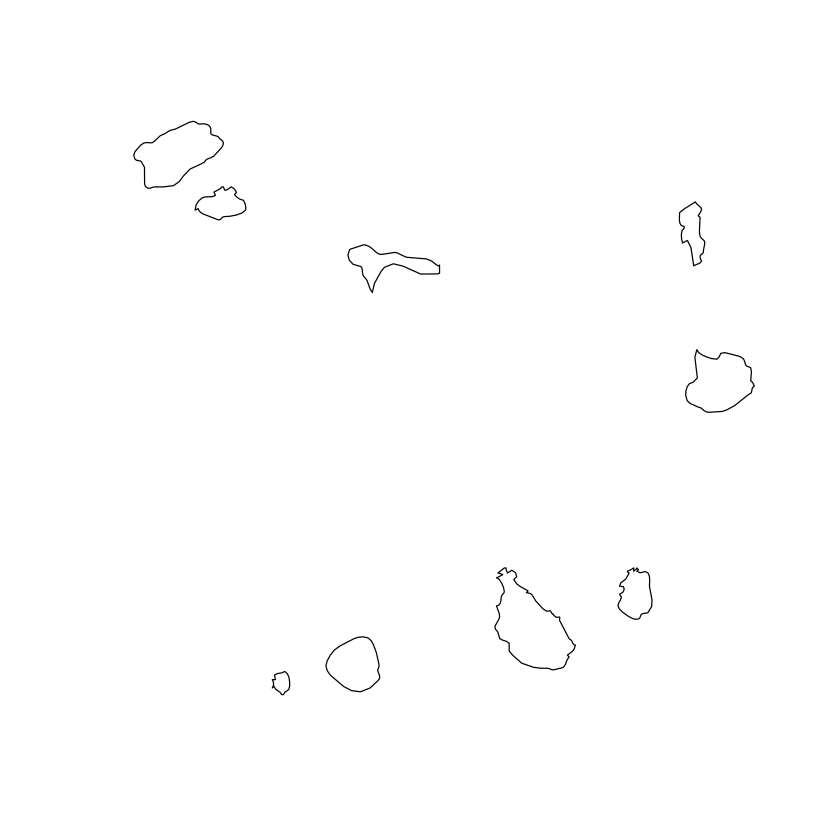

In [24]:
# reteiving shape file for Cape Verde
country_shp <- ne_countries(country="Cabo Verde", scale = 10)
plot(country_shp)
# coordinates can be found in the bbox slot
country_shp@bbox

In [51]:
# Loading precipitation data for 2010
country_pr <- loadGridData("/home/jovyan/shared/data/observations/W5E5/v1.0//w5e5_v1.0.ncml", var = "pr", 
                        lonLim = c(country_shp@bbox[1,1]-1,country_shp@bbox[1,2]+1), latLim = c(country_shp@bbox[2,1]-1,country_shp@bbox[2,2]+1), year=1995)

[2023-03-17 14:34:47] Defining geo-location parameters

[2023-03-17 14:34:47] Defining time selection parameters

[2023-03-17 14:34:47] Retrieving data subset ...

Warning message in with_tz.default(x, tz):
“Unrecognized time zone 'GMT'”
[2023-03-17 14:34:51] Done



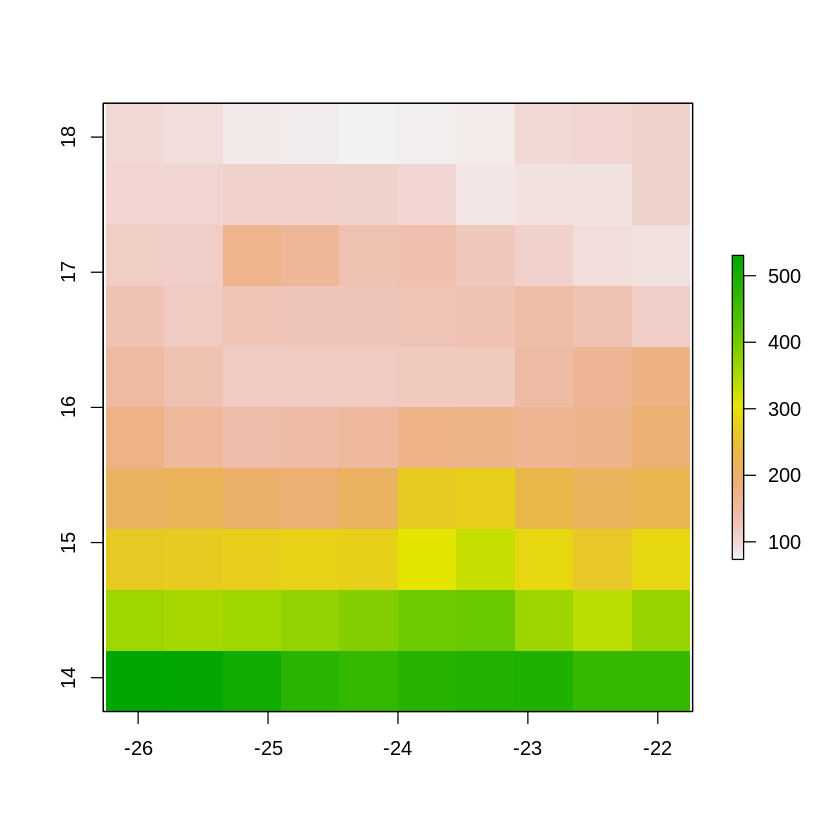

In [52]:
Data <- apply(country_pr$Data, c(2,3), "sum")

rst <- raster(Data, xmx=max(country_pr$xyCoords$x),
              xmn=min(country_pr$xyCoords$x), ymn= min(country_pr$xyCoords$y), ymx= max(country_pr$xyCoords$y)) %>% 
flip(durection="y")

plot(rst)

df_rst <- as.data.frame(rst, xy=T)

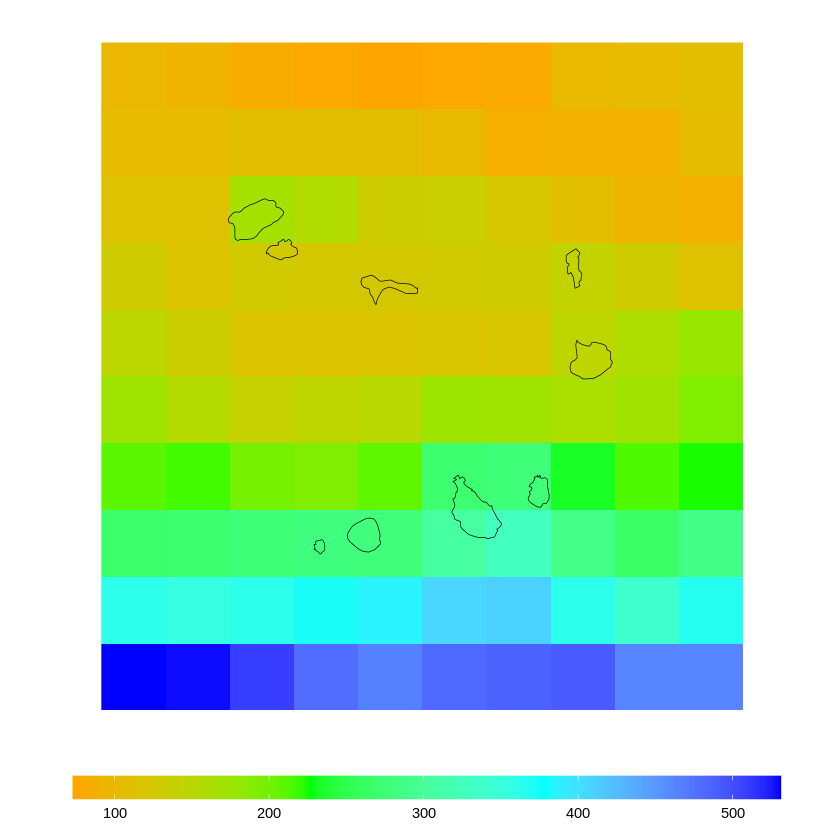

In [53]:
country_sf <- ne_countries(country="Cabo Verde", scale =10, returnclass = "sf")

ggplot()+
geom_raster(aes(x=x, y=y, fill=layer), data=df_rst)+
scale_fill_gradientn(
        colors = c("orange", "green", "cyan", "blue"),
        n.breaks = 5)+
theme( panel.background = element_blank(),
        panel.border = element_blank(),
        axis.text = element_blank(),
        axis.ticks = element_blank(),
        axis.title = element_blank(),
        legend.position="bottom", 
        legend.key.height = unit(0.5, 'cm'),
        legend.key.width = unit(3, 'cm'), 
        legend.title=element_blank())+
geom_sf(data=country_sf, fill=NA, color="black")